GPU support =  False
RMSE after 1000 training steps is [0.21818676]
RMSE after 2000 training steps is [0.41085828]
RMSE after 3000 training steps is [0.07018708]
RMSE after 4000 training steps is [0.10252831]
RMSE after 5000 training steps is [0.55308112]
RMSE after 6000 training steps is [0.47166075]
RMSE after 7000 training steps is [0.35549]
RMSE after 8000 training steps is [0.36768109]
RMSE after 9000 training steps is [0.33515139]
RMSE after 10000 training steps is [0.28080083]
RMSE after 11000 training steps is [0.37237831]
RMSE after 12000 training steps is [0.39247652]
RMSE after 13000 training steps is [0.3533324]
RMSE after 14000 training steps is [0.48893672]
RMSE after 15000 training steps is [0.24363721]
RMSE after 16000 training steps is [0.31997412]
RMSE after 17000 training steps is [0.7758148]
RMSE after 18000 training steps is [0.48258485]
RMSE after 19000 training steps is [1.02860644]
RMSE after 20000 training steps is [0.25023755]
RMSE after training is [0.2502375

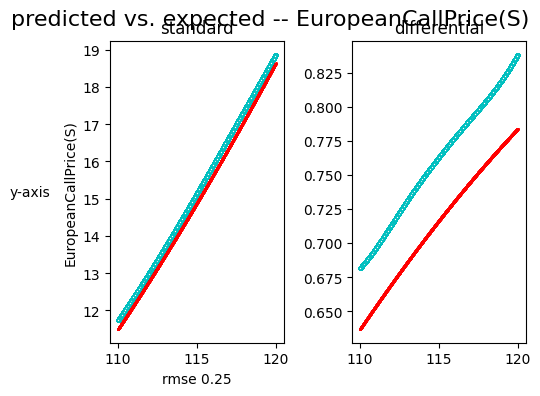

In [3]:
### Copy of Main.py as a juypter notebook to visualize results

#del sys.modules['DataImporter']

###
### 0. Import packages and references
###
### Import framework
import os
mainDirectory = os.path.abspath(os.path.join(os.getcwd() , '..', '..','..','..'))
packageFile = os.path.abspath(os.path.join(mainDirectory, 'montecarlolearning', 'packages.py'))
exec(open(packageFile).read())

###
### 1. Training data Generator/Importer
###

Generator = GBM_Differential(GBM_Case.Standard)
Generator.set_inputName('S')
Generator.set_outputName('EuropeanCallPrice(S)')

###
### 2. Set Nueral network structure / Hyperparameters
### 

Regressor = Neural_Approximator()
Regressor.set_Generator(Generator)
Regressor.set_hiddenNeurons(50)
Regressor.set_hiddenLayers(2)
Regressor.set_activationFunctionsHidden(tf.nn.sigmoid)
Regressor.set_activationFunctionOutput(tf.nn.softplus)
Regressor.set_weight_seed(1)

#hiddenNeurons = 20               # we use equal neurons for each hidden layer
#hiddenLayers = 3                # amount of hidden layers
#activationFunctionsHidden = [tf.nn.tanh]   # activation functions of hidden layers


###
### 3. Set Nueral network structure / Hyperparameters
### 

TrainSettings = TrainingSettings()
TrainSettings.set_learning_rate_schedule([(0.0, 0.001)])
TrainSettings.set_min_batch_size(1)
TrainSettings.set_test_frequency(1000)
TrainSettings.set_nTest(20000)
TrainSettings.set_samplesPerStep(2000)
TrainSettings.set_trainingSteps(20000)


###
### 3. Train network and Study results
### Comment: For different trainingSetSizes the neural network reset and not saved, hence train and evaluation of yPredicted are done together currently
###
xTest, yTest, yPredicted, yDeltas, yPredictedDeltas = train_and_test(Generator, Regressor, TrainSettings)
plot_results("predicted vs. expected", yPredicted, xTest, yTest, Generator, yDeltas, yPredictedDeltas)